K fold-Cross Validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

In [4]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 96, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN

Checking consistency Using crossValidation

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN(n_neighbors=4), train_x, train_y, cv = 10)
score.mean()*100, score.std()*100

(77.55088195386703, 5.536241560375975)

Checking for different values of K-neighbors

In [9]:
def check(K):
    val_means = []
    val_std = []
    for i in K:
        score = cross_val_score(KNN(n_neighbors=i), train_x, train_y, cv=10)
        val_means.append(score.mean())
        val_std.append(score.std())
    
    return val_means, val_std

In [10]:
K = range(1, 50)
mean, std = check(K)

Text(0, 0.5, 'mean')

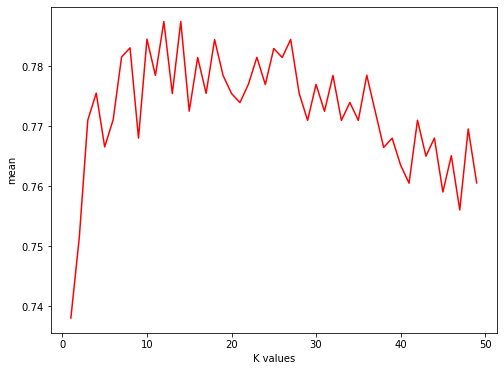

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(K, mean, color = 'red', label = 'mean')
plt.xlabel('K values')
plt.ylabel('mean')

The highest value can be found between 10 and 20 Checking that range

Text(0, 0.5, 'mean')

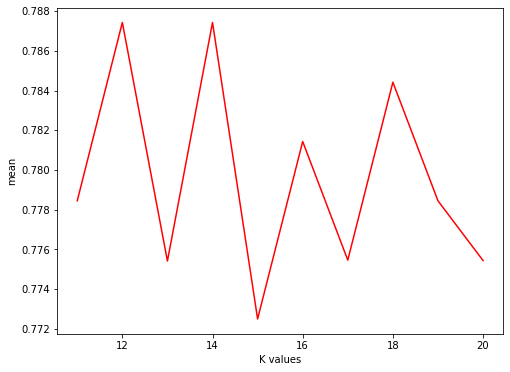

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(K[10:20], mean[10:20], color = 'red', label = 'mean')
plt.xlabel('K values')
plt.ylabel('mean')

We can see that maximum value is aroung 14 Checking for standard deviation between 10 and 20

Text(0, 0.5, 'mean')

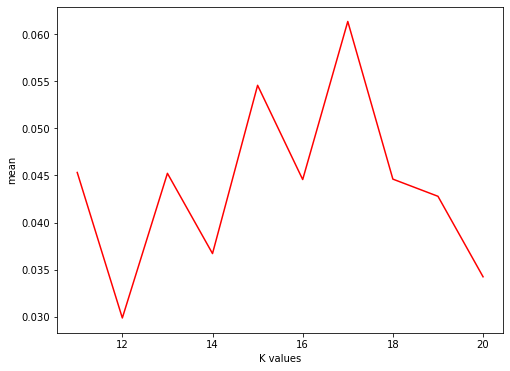

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(K[10:20], std[10:20], color = 'red', label = 'mean')
plt.xlabel('K values')
plt.ylabel('mean')

In [15]:
from sklearn.metrics import f1_score
clf = KNN(n_neighbors=14)
clf.fit(train_x, train_y)
train_predict = clf.predict(train_x)
test_predict = clf.predict(test_x)
f1_train = f1_score(train_predict, train_y)
f1_test = f1_score(test_predict, test_y)

In [16]:
f1_train, f1_test

(0.7174887892376681, 0.7132867132867133)

Since the score obtained from test data and train data is not so different the cross validation is quite successful